<a href="https://colab.research.google.com/github/sarahkaarina/basic-stats-training/blob/main/one_way_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple group comparison**
*Anovas and post-hoc tests*

Say you've run an experiment where you have more than two groups of people. For example, let's pretend we are interested in understanding whether there is a difference in the nuber of hours domesticated pets spend sleeping at home.

Let's say we know that that the majority of people own dogs, cats, and mice.

So we are going to measure the number of hours dogs, cats, and mice spend sleeping on a given day.

We collect data from 100 random dogs, 100 radom cats, and 100 mice.

Let's get started!

In [91]:
"""
In this line of code we are going to import our python libraries.
The first two libraries will help us manage (pandas) and handle (numpy) our data.
"""
import pandas as pd
import numpy as np

"""
These next libraries will help us plot and do our stats!
"""
#plot
import matplotlib.pyplot as plt

#do stats
import scipy.stats as stats

# generate random numbers
import random

# let's set a seed as well,
# to maintain the same randomization every time we run the code

random.seed(990)

# I'm going to supress all warnings (for the time being)

import warnings
warnings.filterwarnings('ignore')

**STEP 1**
*Get our data*

The first thing we want to do is generate some fake data.

To do this, we're going to simulate a column of data called 'number_of_sleep_hours' that will represent the number of hours slept (i.e 5 = the pet slept 5 hours).

In [92]:
#https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/

# Create an empty dataframe
dog_data = []
cat_data = []
mice_data = []

# Loop over the number of animals in each group (n=100)
for i in range(100):

  # Random.normal will simulate a bunch of NORMALLY DISTRIBUTED integers
  # We center around a fake mean (loc) and provide a fake standard deviation (scale)

  # We are also going to simulate it so dogs sleep the most, then cats, then mice
  dog = np.random.normal(loc = 15, scale = 2, size = 1)
  cat = np.random.normal(loc = 13, scale = 2, size = 1)
  mice = np.random.normal(loc = 9, scale = 2, size = 1)

  # Round our values to ceiling value

  dog = int(dog)
  cat = int(cat)
  mice = int(mice)

  data_dict = {"dog" : dog, "cat" : cat, "mice" : mice}

  # Store our data in our empty dfs
  dog_data.append(data_dict["dog"])
  cat_data.append(data_dict["cat"])
  mice_data.append(data_dict["mice"])

  # Create our pandas dfs
  dog_df = pd.DataFrame({'group' : 'dog',
                          'number_of_sleep_hours': dog_data})
  cat_df = pd.DataFrame({'group' : 'cat',
                          'number_of_sleep_hours': cat_data})
  mice_df = pd.DataFrame({'group' : 'mice',
                          'number_of_sleep_hours': mice_data})

# Finally we create a pandas dataframes (with column names etc.) using pandas

fake_sleep_data_df = pd.concat([dog_df, cat_df, mice_df])

Let's check our dataframe!

In [ ]:
fake_sleep_data_df.head()

,group,number_of_sleep_hours
0,dog,13
1,dog,15
2,dog,15
3,dog,16
4,dog,15


As we can see, we now have a dataframe containing two columns 'group' and 'number_of_sleep_hours', that is 300 rows long (NB! 100 rows of dogs, 100 of cats and 100 of mice).

**STEP 2**
*Look at the data*

Before we run any analysis, let's visualize the differences between our groups.

What do we see?

<Figure size 640x480 with 0 Axes>

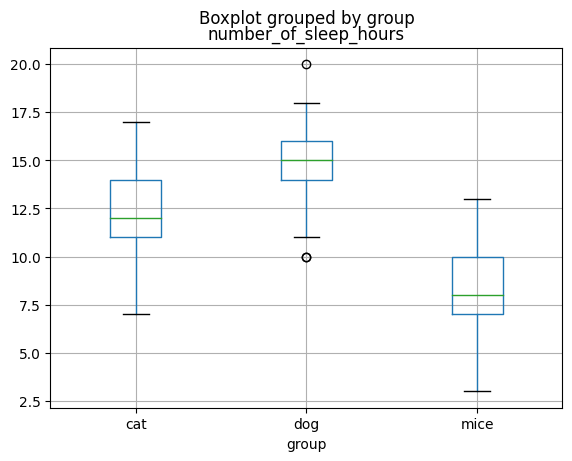

In [ ]:
# Create the empty figure in which to store out plot
fig = plt.figure() # <-- edit figure sizes and other specs in here

# Create a box plot from our data
fake_sleep_data_df.boxplot(column = "number_of_sleep_hours", by = "group")

# Show plot
plt.show()

As we could have probably predicted (from the fake data we generated), it seems that dogs *on average* sleep longer than cats and mice, cats *on average* sleep longer than mice but not dogs, and mice *on average* sleep less than cats and dogs!

**NB: Why am I highlighting the term "on average"?**

It's important to remember that when running anova's we are, in sum, comparing the average of a variable (in the case number of hours slept) between groups (in this case dogs, cats, and mice). Therefore, when we are describing our results we need to pay close attention that we are talking about *comparing groups*.

**STEP 3**
*Check the data*

**So we decided to run a one-way anova, but is it a good move?**

Before we run any statistical test, we need to run a few more 'checks' (called testing our assumptions).

Difference statistical tests have kinks in their system, so to speak, that means if we don't check our data beforehand we run the risk of running into type 1 or type 2 errors.

For example, if our data is not normally distributed we'll need to pick a test that accounts for the distribution of our data. This will be called a *non-parametric* test (the non-parametric version of the anova is called a krukal-wallis test, will look at it later.).

So what do we need to test?

1.   **Normality**: Is our data normally distributed?
2.   **Homogeneity of variance**: Is the variance in our outcome variable (hours of sleep) similar across groups?
3. **Idependence**: our individual sample points are not related to each other (each sample is from a single animal, i.e., we haven't collected data from the same animal more than once.).
4. **Random sampling**: Our groups are not related to each other and have been randomly sample from the population.

NB: These are the requirements we need to meet **in order to run an anova**. Maybe we want to compare data-points from the same animal (i.e. we collected sleep data from the same dog over 5 different days). In this case, an another statistical test that doesnt require indepence might be more appropriate!

*Let's now test is our data normally distributed and does it meet the homogeneity of variance requirement*

(The other two, indepence and random sampling, we can determine when we are designing our experiment and/or collecting our data).

**Testing Normality**
If we obtain a non-significant p-value (p > 0.05) from our normality test (also known as a Shapiro-Wilks test), this tells us that the data is normally distributed.

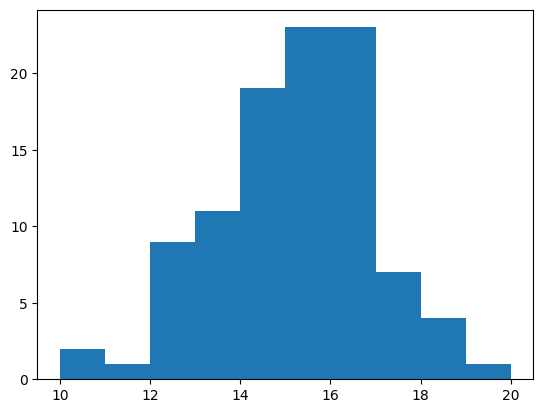

NormaltestResult(statistic=1.3168631422736772, pvalue=0.5176626150943258)


In [ ]:
# Plot our distribution
#fig = plt.figure()
plt.hist(dog_df["number_of_sleep_hours"])
plt.show()

# Test normality in the dog group
print(stats.normaltest(dog_df["number_of_sleep_hours"]))


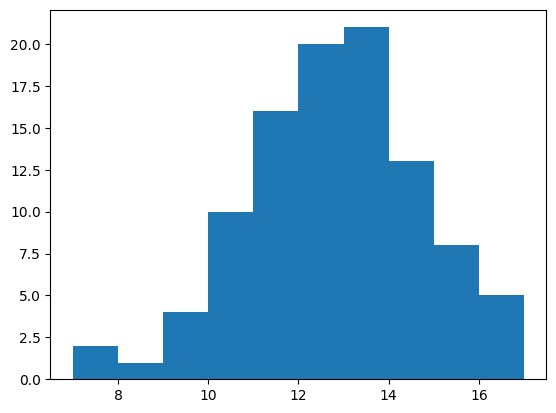

NormaltestResult(statistic=0.8941334717944618, pvalue=0.6395012291623939)


In [ ]:
# Test normality in the cat group
#fig = plt.figure()
plt.hist(cat_df["number_of_sleep_hours"])
plt.show()

# Test normality in the dog group
print(stats.normaltest(cat_df["number_of_sleep_hours"]))

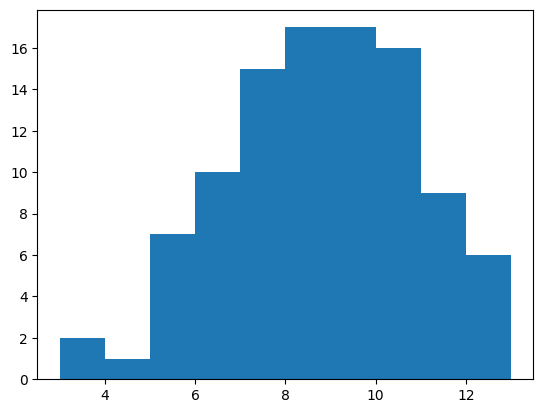

NormaltestResult(statistic=0.3237320034697687, pvalue=0.8505551698216287)


In [ ]:
# Test normality in the mouse group
#fig = plt.figure()
plt.hist(mice_df["number_of_sleep_hours"])
plt.show()

# Test normality in the dog group
print(stats.normaltest(mice_df["number_of_sleep_hours"]))

**Testing Homogeneity**
If we find no significant difference between the variance in each group (p > 0.05), it means it's unlikley our groups differ in their variance.

Therefore we can assume we have homogeneity of variance in our data!

In [ ]:
# Testing Homogeneity of Variance

stats.levene(dog_df["number_of_sleep_hours"],
               cat_df["number_of_sleep_hours"],
               mice_df["number_of_sleep_hours"])

LeveneResult(statistic=2.2026690352910574, pvalue=0.11230993695541044)

Did we meet the requirements to run our anova?

**STEP 4**
*Test the data*

Assuming we have met the requirements to run an anova (I don't know, you tell me!), let's get started.

Now, there are a couple of ways to do this in python but for the sake of simplicity we're going to use the 'f_oneway' function from scipy's stats package.

In [ ]:
stats.f_oneway(dog_df["number_of_sleep_hours"],
               cat_df["number_of_sleep_hours"],
               mice_df["number_of_sleep_hours"])

F_onewayResult(statistic=51.26794583858411, pvalue=7.469585255402805e-20)

We've run our anova and what do we see?

This function provides us with two critical values:


1.   **Statistic**: which tells us the effect size of our model(*).
2.   **P-value**: the p-value of our model.

(*) we'll get into effect sizes later.

The p-value, in this case, is 0.000000000000000000075. If we use the standard threshold of 95% and consider any p-values as < 0.05 as significant, I'd say we're doing good (so far).

However, these summary statistics only tell us whether *overall* our groups differed significantly in the number of hours they slept (the outcome variable).

It may be possible that only two groups are majorly different (i.e. dogs and mice) but another group isn't (i.e. cats and mice). A large difference in one group and no difference in another could still be pushing our model into allowing us to conclude that we have a significant difference in sleep patterns between our groups.

*So what do we do now?*


**STEP 5**
*Post-hoc testing*

To answer the above question, we want to test which pairs of groups are significantly to each other (and to what extent).

We can do this by running what are called 'post-hoc' tests. One of the more common ones for anovas is called a Tukey test.

Let's see it in action!


In [ ]:
"""
In the stats library, the groups are defined as follows:
0 = the first group
1 = the second group
2 = the third group

So in our case we have, 0 = dogs, 1 = cats, 2 = mice
"""

res = stats.tukey_hsd(dog_df["number_of_sleep_hours"],
               cat_df["number_of_sleep_hours"],
               mice_df["number_of_sleep_hours"])

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.420     0.000     1.763     3.077
 (0 - 2)      6.390     0.000     5.733     7.047
 (1 - 0)     -2.420     0.000    -3.077    -1.763
 (1 - 2)      3.970     0.000     3.313     4.627
 (2 - 0)     -6.390     0.000    -7.047    -5.733
 (2 - 1)     -3.970     0.000    -4.627    -3.313



From the tukey test, can we answer the following?

1.   Was there any pair of two groups that was so different it was dragging our overall anova results?
2.   Or are all the groups significantly different between each other?



**References**

Breakdown of running an anova, in steps: https://www.editage.com/blog/anova-types-uses-assumptions-a-quick-guide-for-biomedical-researchers/

Different ways of running it in python:
https://www.pythonfordatascience.org/anova-python/

Testing normality: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

Levene's test, homogeneity of variance: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

Krukal-wallis test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

Tukey test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html